<a href="https://colab.research.google.com/github/aschauhan241/Stock_Prediction/blob/main/Level_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Level A
Dataset:
Refer to this dataset of Nifty Stock prices of Indian companies.
(https://www.kaggle.com/rohanrao/nifty50-stock-market-data)

Problem Statement:
Create a Predictive Model using any Algorithm (any Deep Learning/Machine Learning) that can predict the stock price(Close column) of ASIANPAINTs.  Refer Forecasting: Principles and Practice if you require any theoretical guidance on Time Series(e.g. metrics of importance, auto-correlation, seasonality, etc.).

Make a prediction for the year of 2008 using all previous data. Make a prediction for 2016 using data from 2009-2015.

Show accuracy of your algorithm and explain your choice of accuracy metric (RMSE/MAE/MAPE, etc.)


In [ ]:
#Install Kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files # Import files from the computer - Upload the kaggle.json file for the dataset
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashutoshchauhansingh","key":"bce8d3ca95732c3079a7b8b46d3c72a6"}'}

In [ ]:
! mkdir ~/.kaggle # Create a Kaggle folder

In [ ]:
#Copy the kaggle.json into the folder created

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json #reading the file with full access

In [ ]:
! kaggle datasets download -d rohanrao/nifty50-stock-market-data #Import the required dataset nifty50

 98% 18.0M/18.4M [00:01<00:00, 23.3MB/s]
100% 18.4M/18.4M [00:01<00:00, 13.9MB/s]


In [ ]:
!mkdir nifty50 #make a directory to unzip the dataset

In [ ]:
! unzip nifty50-stock-market-data.zip -d nifty50 # Unzip the file into the nifty50 directory we created.


Archive:  nifty50-stock-market-data.zip
  inflating: nifty50/ADANIPORTS.csv  
  inflating: nifty50/ASIANPAINT.csv  
  inflating: nifty50/AXISBANK.csv    
  inflating: nifty50/BAJAJ-AUTO.csv  
  inflating: nifty50/BAJAJFINSV.csv  
  inflating: nifty50/BAJFINANCE.csv  
  inflating: nifty50/BHARTIARTL.csv  
  inflating: nifty50/BPCL.csv        
  inflating: nifty50/BRITANNIA.csv   
  inflating: nifty50/CIPLA.csv       
  inflating: nifty50/COALINDIA.csv   
  inflating: nifty50/DRREDDY.csv     
  inflating: nifty50/EICHERMOT.csv   
  inflating: nifty50/GAIL.csv        
  inflating: nifty50/GRASIM.csv      
  inflating: nifty50/HCLTECH.csv     
  inflating: nifty50/HDFC.csv        
  inflating: nifty50/HDFCBANK.csv    
  inflating: nifty50/HEROMOTOCO.csv  
  inflating: nifty50/HINDALCO.csv    
  inflating: nifty50/HINDUNILVR.csv  
  inflating: nifty50/ICICIBANK.csv   
  inflating: nifty50/INDUSINDBK.csv  
  inflating: nifty50/INFRATEL.csv    
  inflating: nifty50/INFY.csv        
  inflatin

In [ ]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content': ['.config', 'nifty50', 'kaggle.json', 'nifty50-stock-market-data.zip', 'sample_data']


In [ ]:
data_dir = '/content/nifty50' # go in that directory
os.chdir(data_dir)

In [ ]:
cwd = os.getcwd() # now again check the cwd and make sure it has csv files inside those.
print("Current working directory: ", cwd)

Current working directory:  /content/nifty50


In [ ]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
# Reading the csv file , making Date as our Index without dropping it as column.
df = pd.read_csv("ASIANPAINT.csv")
df['Date']=pd.to_datetime(df['Date'])
df.set_index("Date", drop=False, inplace=True)
df.head()



,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318,1.262617e+11,NaN,NaN,NaN
2000-01-04,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818,1.847699e+11,NaN,NaN,NaN
2000-01-05,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628,9.981384e+10,NaN,NaN,NaN
2000-01-06,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354,1.274114e+11,NaN,NaN,NaN
2000-01-07,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589,3.676275e+11,NaN,NaN,NaN


<Axes: xlabel='Date'>

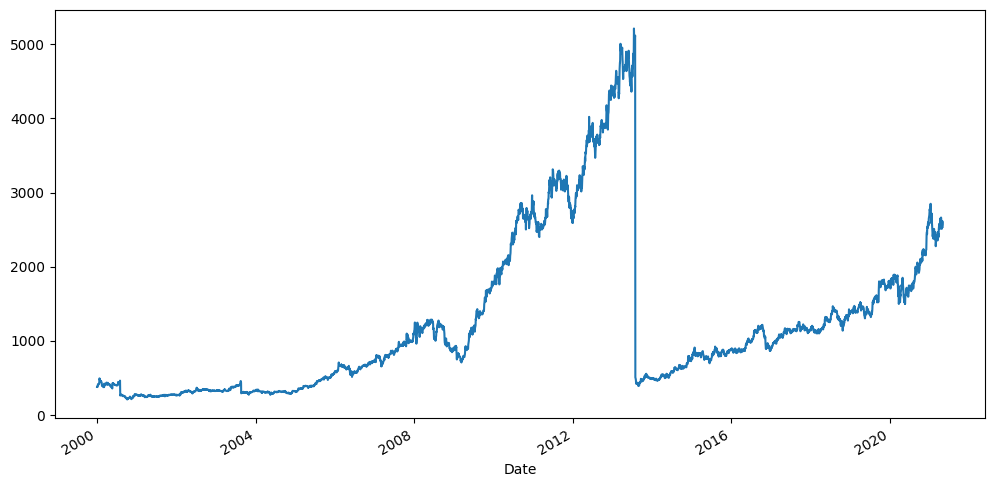

In [ ]:
df.Close.plot(figsize=(12, 6)) # Plot the close overtime

In [ ]:
df.describe()  # Check summary statistics of the dataset

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1247.000952,1247.683952,1264.625349,1230.900697,1247.317132,1247.410903,1247.799926,5.096721e+05,6.942919e+13,41346.011401,2.751281e+05,0.625572
std,1074.399506,1074.025577,1087.238871,1062.629409,1074.432667,1074.476439,1075.057438,8.535993e+05,1.443973e+14,36435.449733,4.157465e+05,0.187597
min,210.750000,210.000000,215.750000,204.000000,210.600000,210.750000,212.220000,2.500000e+01,1.278415e+09,70.000000,2.500000e+01,0.076800
25%,415.737500,415.000000,424.950000,410.000000,416.000000,416.262500,415.692500,1.370750e+04,7.538133e+11,16264.750000,1.262200e+04,0.486200
50%,889.375000,890.000000,903.975000,878.075000,890.000000,889.475000,888.350000,5.713600e+04,1.109437e+13,32402.500000,5.273800e+04,0.616100
75%,1599.037500,1599.800000,1629.675000,1573.037500,1602.500000,1600.762500,1600.982500,8.077905e+05,7.761479e+13,54727.500000,4.383750e+05,0.765500
max,5213.100000,5221.100000,5247.750000,5150.050000,5221.100000,5213.100000,5175.790000,1.154594e+07,2.216650e+15,351347.000000,7.938427e+06,1.000000


In [ ]:
df.shape

(5306, 15)

In [ ]:
df_close = df[['Close']].copy()

In [ ]:
df_close.head(10)

,Close
Date,
2000-01-03,381.65
2000-01-04,385.55
2000-01-05,383.00
2000-01-06,377.50
2000-01-07,385.70
2000-01-10,415.00
2000-01-11,415.20
2000-01-12,417.65
2000-01-13,418.70


In [ ]:
df_close.describe()

,Close
count,5306.000000
mean,1247.410903
std,1074.476439
min,210.750000
25%,416.262500
50%,889.475000
75%,1600.762500
max,5213.100000


In [ ]:
from statsmodels.tsa.stattools import adfuller  # Test for stationarity using ADF test

result = adfuller(df.Close)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.134728936884083
p-value: 0.23078109376737815


<b>Fail to reject the null hypothesis as the p-value is greater than 0.05<b>

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.0 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima.utils import ndiffs

In [ ]:

# Use the 'adf' test to decide the order of differencing
diff_order_adf = ndiffs(df.Close, test='adf')

# Use the 'kpss' test to decide the order of differencing
diff_order_kpss = ndiffs(df.Close, test='kpss')

# Use the 'pp' test to decide the order of differencing
diff_order_pp = ndiffs(df.Close, test='pp')

print("Order of differencing (ADF test):", diff_order_adf)
print("Order of differencing (KPSS test):", diff_order_kpss)
print("Order of differencing (PP test):", diff_order_pp) #To decide what order of differencing we need.

Order of differencing (ADF test): 1
Order of differencing (KPSS test): 1
Order of differencing (PP test): 1


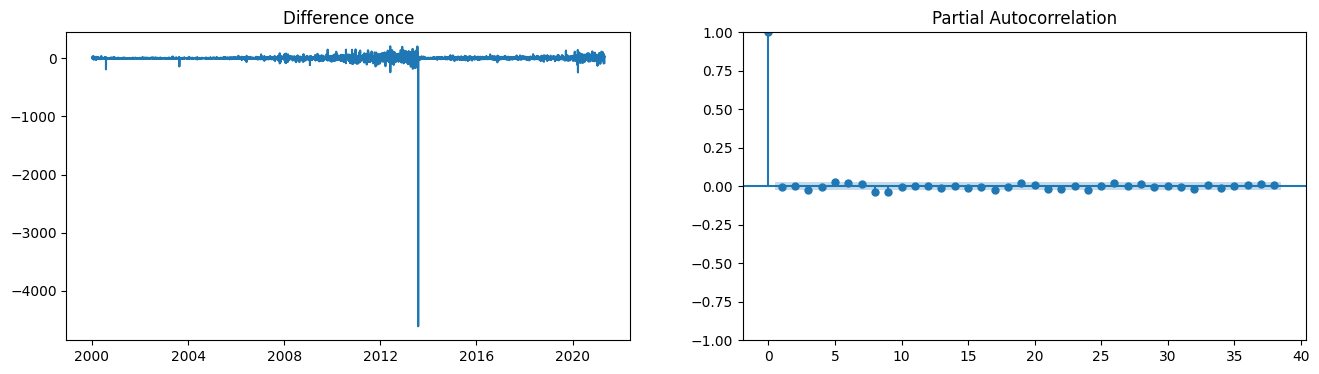

In [ ]:
diff = df.Close.diff().dropna() #Perform first order differencing
# Plot the differenced data and the PACF
fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)

# Explicitly set the method parameter to 'ywm' to avoid the warning
plot_pacf(diff, ax=ax2, method='ywm')
plt.show()

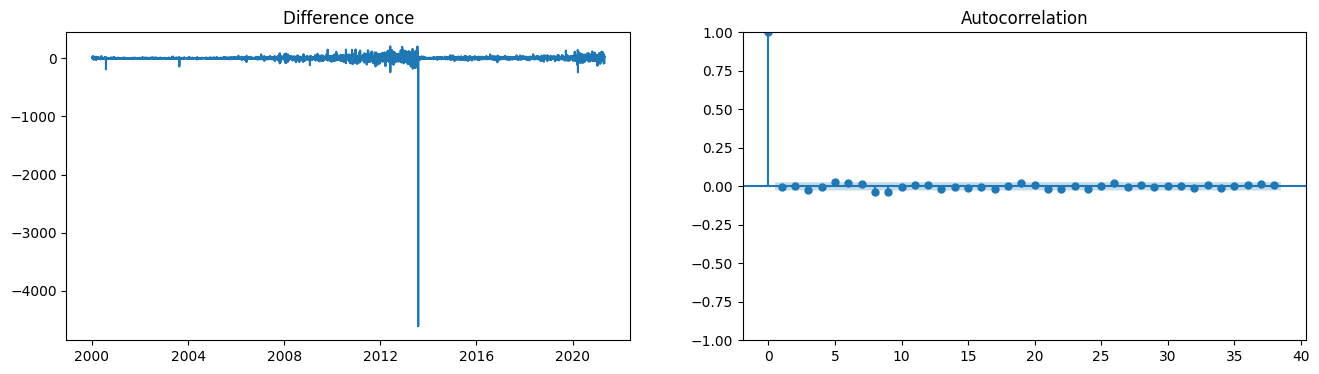

In [ ]:
diff = df.Close.diff().dropna() #Perform first order differencing
# Plot the differenced data and the ACF
fig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)

# Explicitly set the method parameter to 'ywm' to avoid the warning
plot_acf(diff, ax=ax2)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Set the order for the ARIMA model based on the differencing results
p, d, q = 1, 1, 1

model = ARIMA(df.Close,order=(p,d,q))

train_data_2000_2007 = df['2000':'2007']['Close']

# Training data for 2009 to 2015
train_data_2009_2015 = df['2009':'2015']['Close']

# Test data for 2008
test_data_2008 = df.loc['2008']['Close']

# Test data for 2016
test_data_2016 = df.loc['2016']['Close']


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

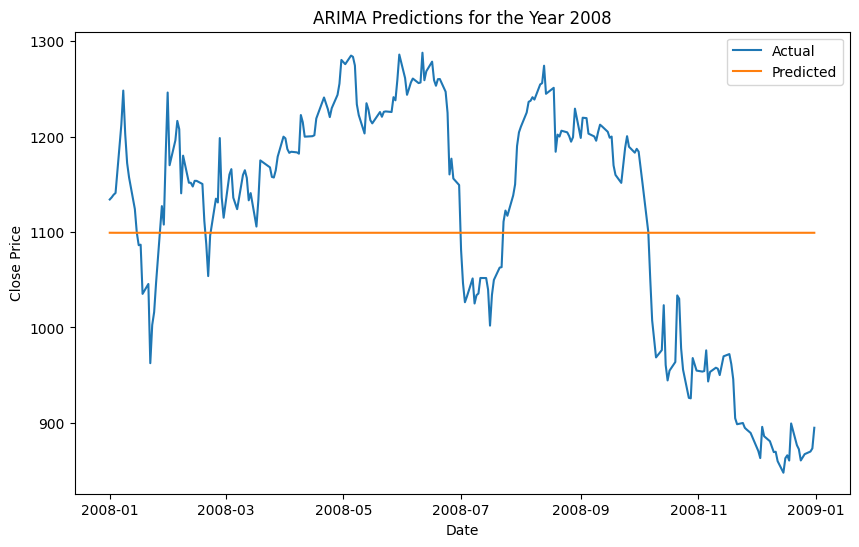

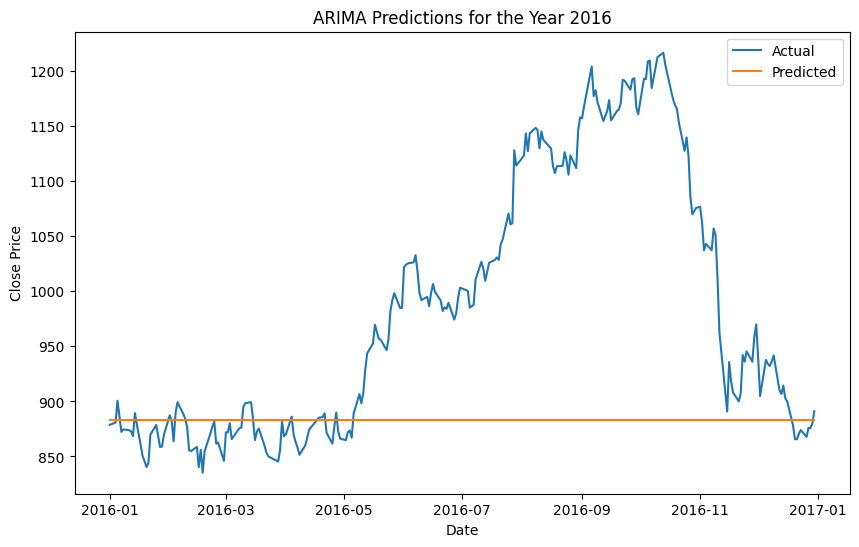

RMSE for prediction in 2008: 125.56
RMSE for prediction in 2016: 152.50


In [ ]:
# Function to make predictions and evaluate the ARIMA model
def make_predictions_and_evaluate(train_data, test_data, order):
    model = ARIMA(train_data, order=order)
    arima_results = model.fit()
    start_idx = len(train_data)  # Get the starting index for predictions
    end_idx = start_idx + len(test_data) - 1  # Get the ending index for predictions
    predictions = arima_results.predict(start=start_idx, end=end_idx, typ='levels')
    rmse = np.sqrt(mean_squared_error(test_data, predictions))
    return predictions, rmse

# Make predictions for 2008 using data from 2000 to 2007
predictions_2008, rmse_2008 = make_predictions_and_evaluate(train_data_2000_2007, test_data_2008, order=(p, d, q))

# Make predictions for 2016 using data from 2009 to 2015
predictions_2016, rmse_2016 = make_predictions_and_evaluate(train_data_2009_2015, test_data_2016, order=(p, d, q))

# Plot the predictions for 2008
plt.figure(figsize=(10, 6))
plt.plot(test_data_2008.index, test_data_2008, label='Actual')
plt.plot(test_data_2008.index, predictions_2008, label='Predicted')
plt.title('ARIMA Predictions for the Year 2008')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Plot the predictions for 2016
plt.figure(figsize=(10, 6))
plt.plot(test_data_2016.index, test_data_2016, label='Actual')
plt.plot(test_data_2016.index, predictions_2016, label='Predicted')
plt.title('ARIMA Predictions for the Year 2016')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Display the RMSE for the predictions
print(f"RMSE for prediction in 2008: {rmse_2008:.2f}")
print(f"RMSE for prediction in 2016: {rmse_2016:.2f}")